In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
mean = train_data.mean(axis=0)

In [10]:
train_data -= mean
#train_data = train_data - mean와 같은 표현

In [11]:
# 표준 편차를 구한다.
std = train_data.std(axis=0)

In [12]:
train_data /= std
# train_data = train_data / std

In [13]:
train_data

array([[ -0.67803164,  -0.96723094,  -2.06807658, ...,  -7.2586309 ,
         -3.32642867,  -0.93321053],
       [ -0.80921182,   2.50816872,  -2.96622659, ..., -10.12532043,
         -3.34259981,  -3.08763312],
       [ -0.28084511,  -0.96723094,  -0.60398918, ...,  -7.62265497,
         -3.55388854,  -3.06693079],
       ...,
       [ -0.80781518,   0.50718104,  -2.37382978, ...,  -9.12425424,
         -3.69506686,  -2.43619977],
       [ -0.57870548,  -0.96723094,  -0.38643402, ..., -10.12532043,
         -4.76214942,  -1.33759606],
       [ -0.81001145,   1.56033245,  -2.83392953, ...,  -9.71579335,
         -3.54133462,  -2.91235338]])

In [14]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [15]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [39]:
# 신경망을 만든다.
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [41]:
# K-folder 검증
k = 4

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #',i)

    # 검증 데이터를 준비: k번째 분할
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
    # 훈련 데이터의 준비:
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
        train_data[(i+1)*num_val_samples:]], axis=0)
  
    partial_train_labels = np.concatenate(
        [train_labels[: i * num_val_samples],
        train_labels[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data,
        partial_train_labels,
        epochs=20,
        batch_size=1,
        verbose=0)
  
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [42]:
all_scores

[2.7426092624664307,
 2.6861062049865723,
 3.5809378623962402,
 2.9374217987060547]

In [43]:
np.mean(all_scores)

2.9867687821388245

In [45]:
# K-folder 검증
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #',i)

    # 검증 데이터를 준비: k번째 분할
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
    # 훈련 데이터의 준비:
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
        train_data[(i+1)*num_val_samples:]], axis=0)
  
    partial_train_labels = np.concatenate(
        [train_labels[: i * num_val_samples],
        train_labels[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data,
        partial_train_labels,
        epochs=num_epochs,
        batch_size=1,
        validation_data=(val_data, val_labels),
        verbose=0)
    mae_history = history.history['mae']
    
    
    all_scores.append(mae_history)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [49]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

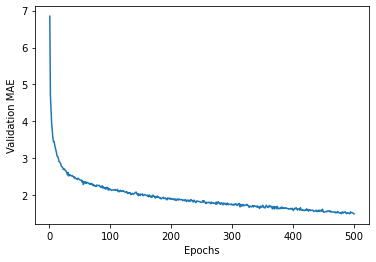

In [50]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
